Búsqueda de grilla (Grid Search)
====================

Es un método de búsqueda de hiperparámetros que permite probar todas las combinaciones posibles. Es un método muy costoso computacionalmente, pero es muy útil para encontrar los mejores valores para un modelo.

Implementación
====================

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [2]:
# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Accuracy:  0.93


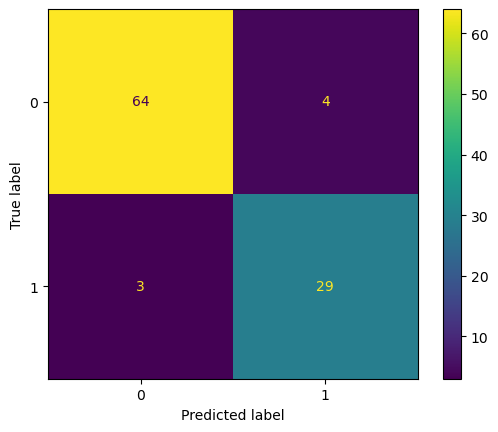

In [3]:
# Ajustamos el modelo
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

# Predecimos los resultados con el conjunto de testing
Y_pred = classifier.predict(X_test)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(cm).plot()
print('Accuracy: ', accuracy_score(Y_test, Y_pred))

In [4]:
# Aplicamos k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.8        0.96666667 0.8        0.96666667 0.86666667 0.83333333
 0.9        0.93333333 1.         0.93333333]
Accuracy: 90.00 %
Standard Deviation: 6.83 %


In [5]:
# Aplicamos grid search para encontrar los mejores parámetros y el mejor rendimiento
from sklearn.model_selection import GridSearchCV
parameters = [
    {
        'C': [0.25, 0.5, 0.75, 1], 
        'kernel': ['linear']
    },
    {
        'C': [0.25, 0.5, 0.75, 1], 
        'kernel': ['rbf'], 
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    }
]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.00 %
Best Parameters: {'C': 0.75, 'gamma': 0.9, 'kernel': 'rbf'}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


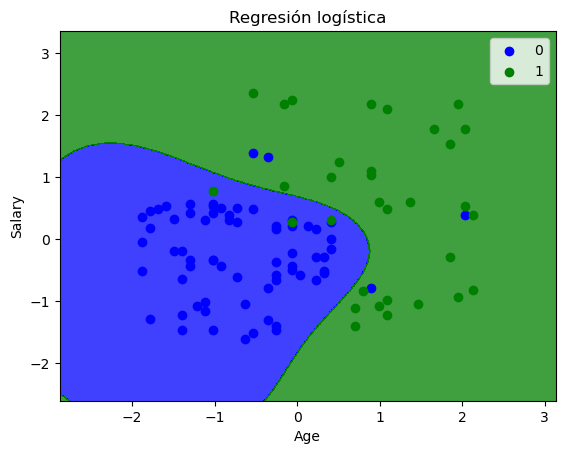

In [6]:
# Representación gráfica de los resultados del algoritmo en el conjunto de prueba
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()